In [43]:
#This is a interactive notebook for introduction to machine lerning
#geared toward begginers with a focus on quantative finance. 
#This session will focus on identifying correlations in data and able to make predictions from it. 
#Authored: Alex Villa, 2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#import yfinance as yf





# What is next 
Now that we are done with importing and setting up the data access path
We can begin to prepare our data. 


In [44]:
#Load the data
SP500_Comp = pd.read_csv('~/Downloads/qfs_ml_workshop/data/sp500_companies.csv')
SP500_Comp[SP500_Comp['State'].isnull()]
SP500_Comp = SP500_Comp.drop(['State'], axis=1)
SP500_Comp.head(10)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,413.64,3073527250944,1.184270e+11,0.176,Redmond,United States,221000.0,Microsoft Corporation develops and supports so...,0.065178
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,172.69,2666661675008,1.301090e+11,0.021,Cupertino,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.056550
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,860.01,2150025003008,3.448000e+10,2.653,Santa Clara,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.045594
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,156.33,1933895925760,1.001720e+11,0.135,Mountain View,United States,182502.0,Alphabet Inc. offers various products and plat...,0.041011
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,154.86,1933550944256,1.001720e+11,0.135,Mountain View,United States,182502.0,Alphabet Inc. offers various products and plat...,0.041003
5,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,183.62,1910143713280,8.551500e+10,0.139,Seattle,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.040507
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,500.23,1275291369472,6.138100e+10,0.247,Menlo Park,United States,67317.0,"Meta Platforms, Inc. engages in the developmen...",0.027044
7,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,400.26,864957890560,1.356820e+11,0.196,Omaha,United States,396500.0,"Berkshire Hathaway Inc., through its subsidiar...",0.018343
8,NYQ,LLY,Eli Lilly and Company,Eli Lilly and Company,Healthcare,Drug Manufacturers - General,750.77,713806643200,1.231460e+10,0.281,Indianapolis,United States,43000.0,"Eli Lilly and Company discovers, develops, and...",0.015137
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,1310.69,607401213952,2.040400e+10,0.164,Palo Alto,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.012881


# Data Visualization

<Figure size 1000x600 with 0 Axes>

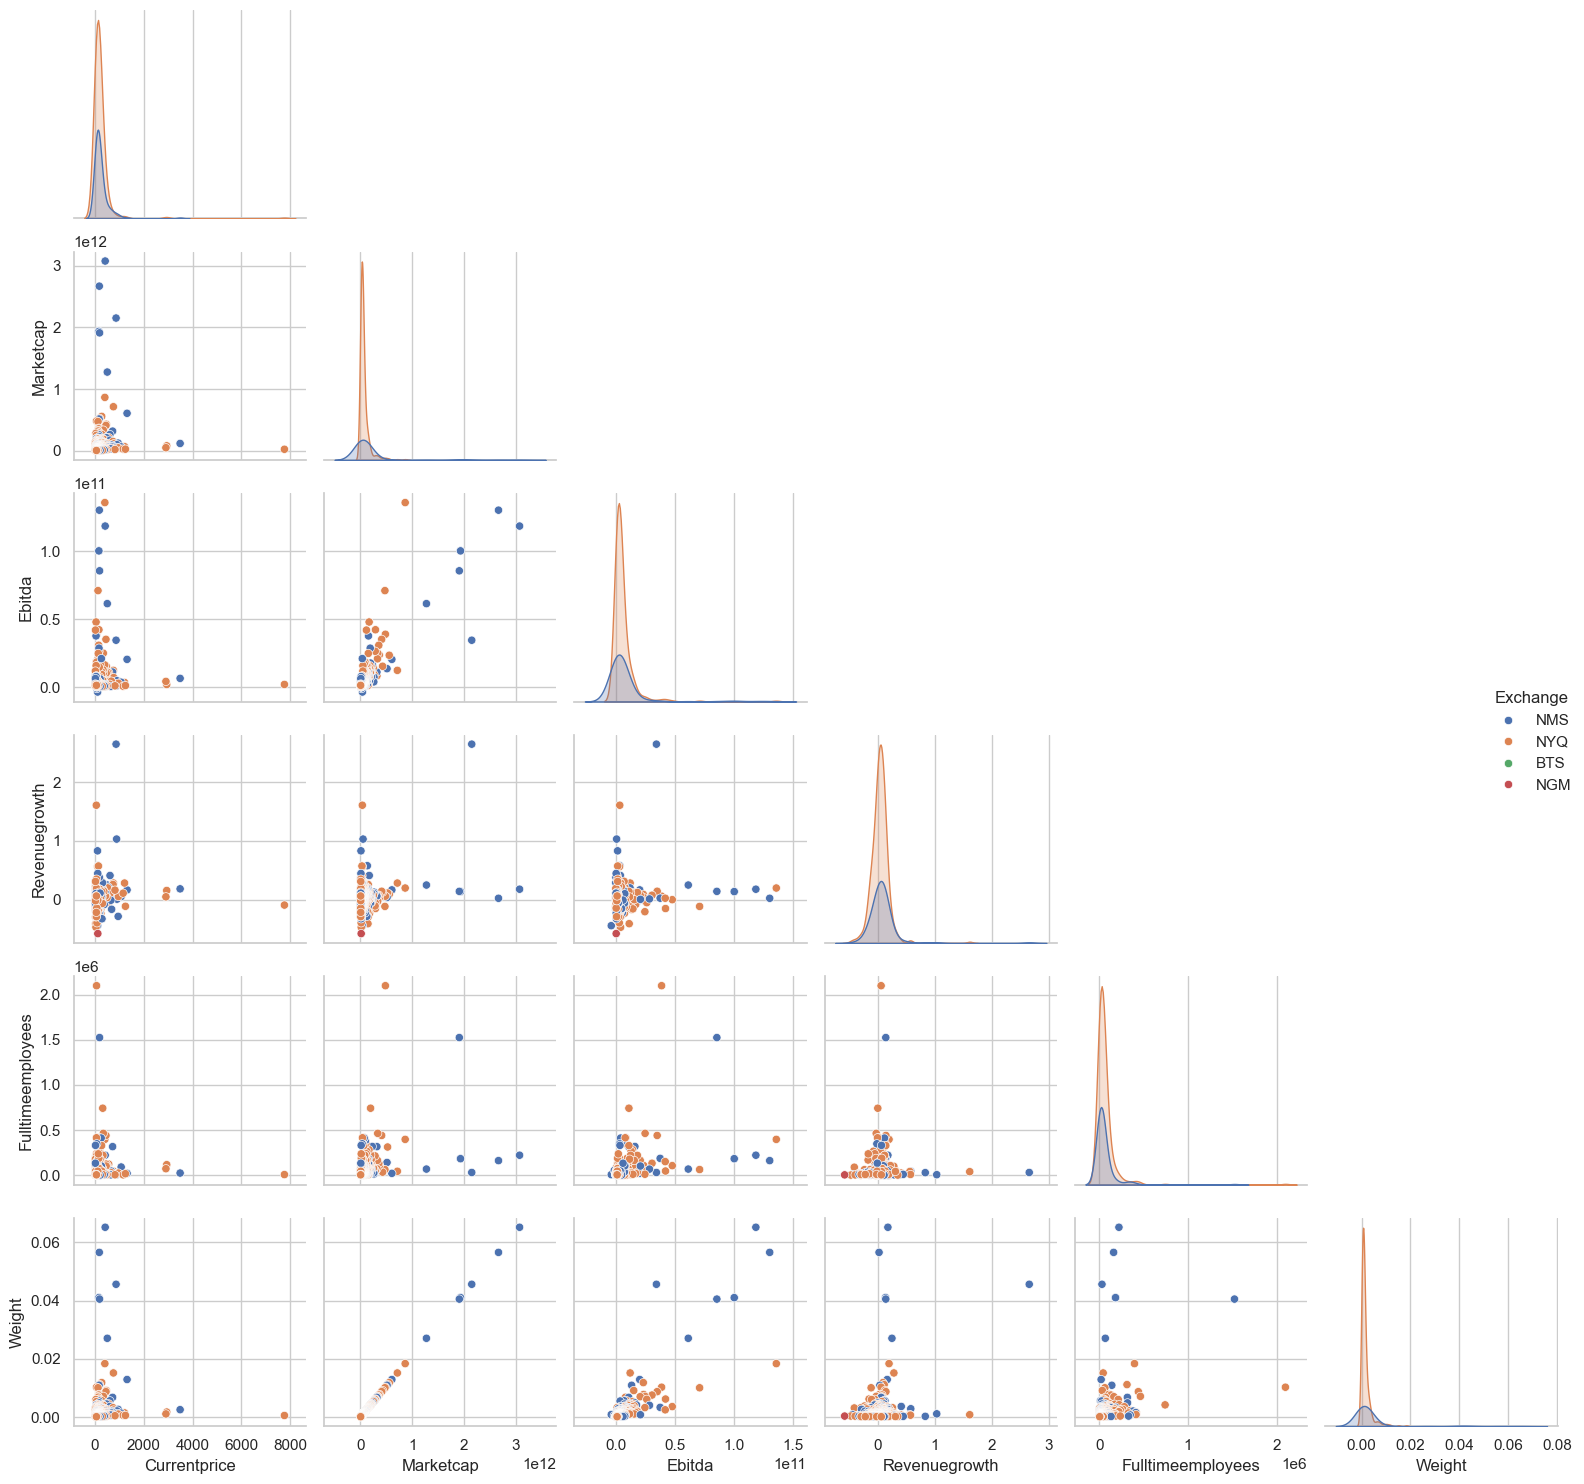

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.pairplot(SP500_Comp, corner=True, hue='Exchange')
plt.tight_layout()

# What is Correlation 
Correlation is the term used in machine learning when there exists such a relationship that results in covariation, or association between two or more variables.

# What is Causation
Causation is the term given when one event occurs as a result of a previous event. 

# Correlation versus Causation?
While Correlation and Causation have a intuition for being similar. They can co-exist but also may not be related. For instance the causation of one event happening from a previous does not mean there exists such correlation. 

# Correlation Heatmap of our data 
# this is a good visualization of what data we are working with. 

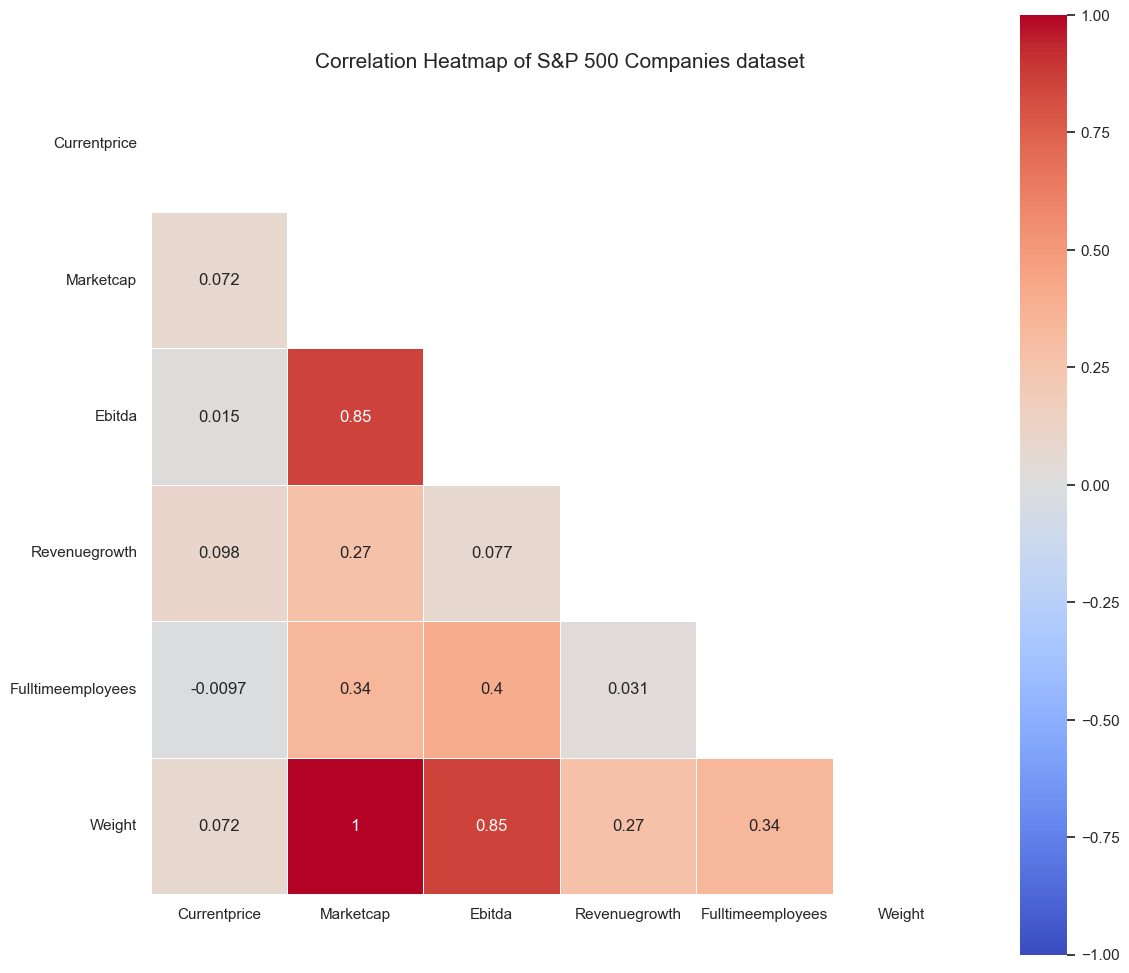

In [46]:
# Remove non-numeric columns from the dataframe
numeric_columns = SP500_Comp.select_dtypes(include=np.number).columns
SP_corr = SP500_Comp[numeric_columns].corr()

mask = np.zeros_like(SP_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(SP_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of S&P 500 Companies dataset', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()


# Distribution Analysis
# Distribution of Revenue Growth 

(-0.7, 3.0)

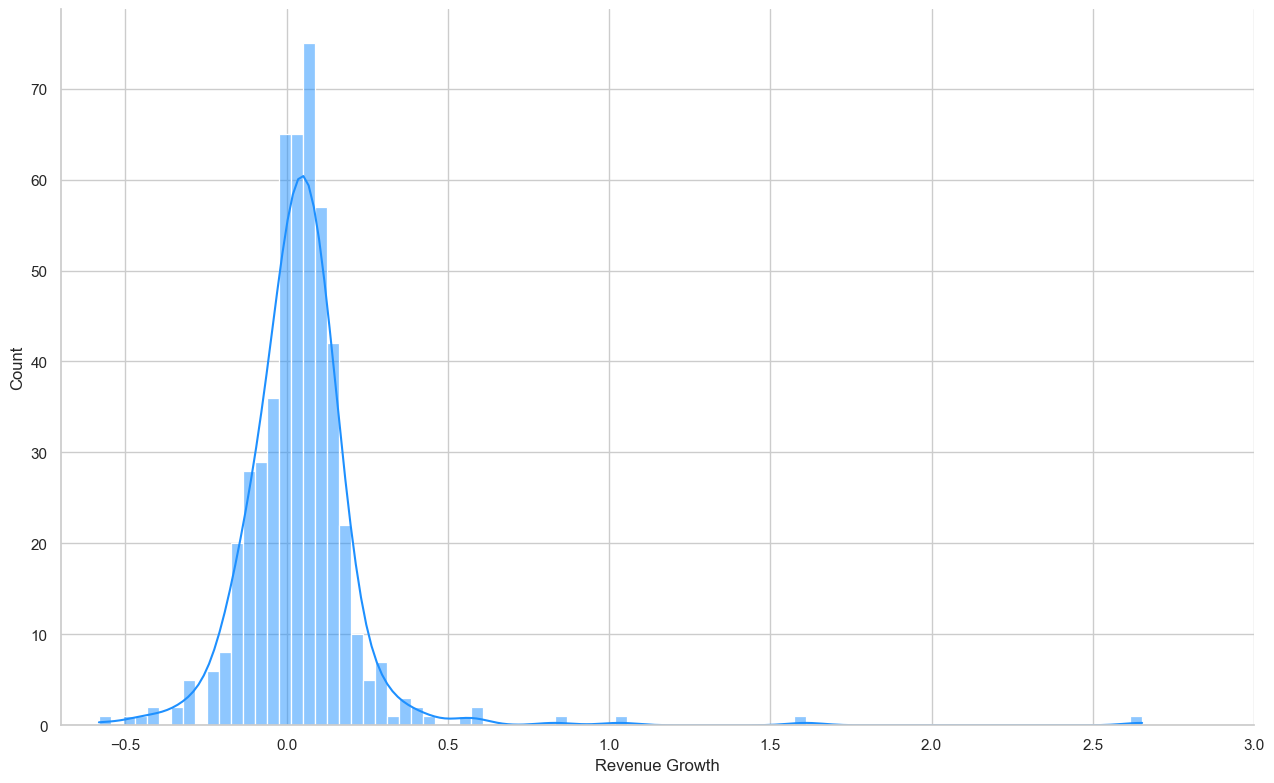

In [47]:
d1 = sns.displot(data=SP500_Comp, x='Revenuegrowth', height=8, aspect=1.6, kde=True, color='dodgerblue')
d1.set(xlabel='Revenue Growth')
plt.xlim(-0.7,3)

## Observations ?



1. Pearson’s correlation of coefficient

<Axes: >

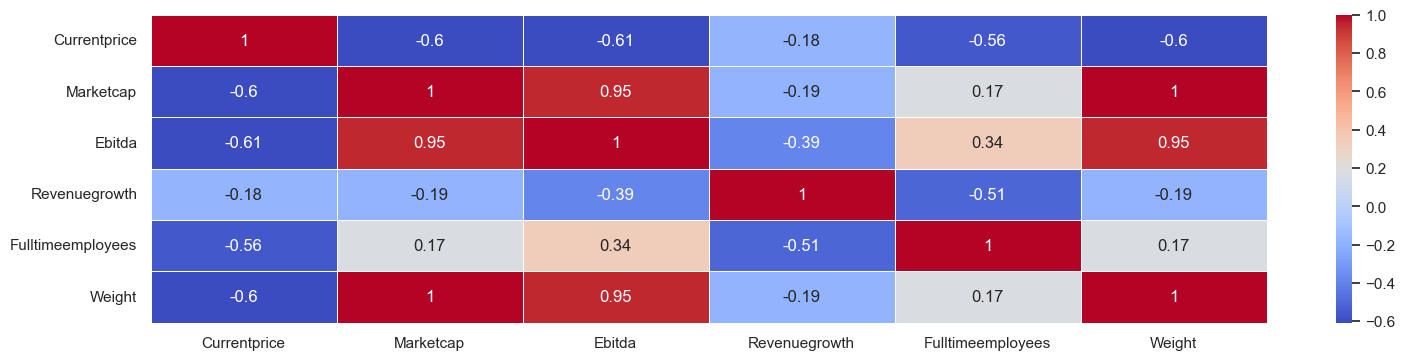

In [48]:
df_corr = SP_corr.corr(method='pearson', min_periods=1)

%matplotlib inline
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, cmap='coolwarm', linewidths=0.5)

# Observations From Above? 

2.  Spearman’s correlation of coefficient

In [ ]:
df_corr = SP500_Corr.corr(method='spearman', min_periods=1)
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, cmap='coolwarm', linewidths=0.5)

3.  ~~Kendall’s Tau correlation of coefficient~~